In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [5]:
collisions = pd.read_csv('collisions.csv')

In [6]:
# Collision Data from Open Data Toronto, showing collisions from Jan 2014 to June 2022
# FTR = Failure to Remain
# PD = Property Damage

collisions = collisions.loc[collisions['Year'] < 2019]
collisions.rename(columns = {'Atom':'Neighbourhood Number'}, inplace = True)

collisions.loc[(collisions['Injury_Collisions'] == 'YES'), 'Injury_Collisions'] = 1
collisions.loc[(collisions['Injury_Collisions'] == 'NO'), 'Injury_Collisions'] = 0

collisions.loc[(collisions['FTR_Collisions'] == 'YES'), 'FTR_Collisions'] = 1
collisions.loc[(collisions['FTR_Collisions'] == 'NO'), 'FTR_Collisions'] = 0

collisions.loc[(collisions['PD_Collisions'] == 'YES'), 'PD_Collisions'] = 1
collisions.loc[(collisions['PD_Collisions'] == 'NO'), 'PD_Collisions'] = 0

collisions['Collision Indicator'] = 1

In [7]:
collisions.dtypes

_id                       int64
EventUniqueId            object
OccurrenceDate           object
Month                    object
Day_of_Week              object
Year                      int64
Hour                    float64
Division                 object
Neighbourhood Number     object
Neighbourhood            object
Fatalities              float64
Injury_Collisions        object
FTR_Collisions           object
PD_Collisions            object
geometry                 object
Collision Indicator       int64
dtype: object

In [9]:
# CSV result of cleaned and manipulated Census data using Excel. Based on 140 neighbourhood model 
# Manipulation included giving scores for % of commutes done by various modes
# The more active the commute (order iswalking/cycling, transit, then car), the higher the score
neighbourhoods = pd.read_csv('TOneighbourhoods.csv')
neighbourhoods['Neighbourhood Number'] = neighbourhoods['Neighbourhood Number'].astype(str)

In [10]:
collisions_df =collisions.merge(neighbourhoods,how="inner",on="Neighbourhood Number")

In [11]:
col_ind = collisions_df.groupby(['Neighbourhood Number'])['Collision Indicator'].agg('sum')
col_inj = collisions_df.groupby(['Neighbourhood Number'])['Injury_Collisions'].agg('sum')
col_ftr = collisions_df.groupby(['Neighbourhood Number'])['FTR_Collisions'].agg('sum')
col_pd = collisions_df.groupby(['Neighbourhood Number'])['PD_Collisions'].agg('sum')

In [12]:
col_ind = col_ind.to_frame().reset_index()
col_inj = col_inj.to_frame().reset_index()
col_frt = col_ftr.to_frame().reset_index()
col_pd = col_pd.to_frame().reset_index()

In [13]:
neighbourhoods = neighbourhoods.merge(col_ind,how="inner",on="Neighbourhood Number")
neighbourhoods = neighbourhoods.merge(col_inj,how="inner",on="Neighbourhood Number")
neighbourhoods = neighbourhoods.merge(col_ftr,how="inner",on="Neighbourhood Number")
neighbourhoods = neighbourhoods.merge(col_pd,how="inner",on="Neighbourhood Number")

In [14]:
# for better comparions between neighbourhoods, collision rate is per capita
neighbourhoods['Collision Rate'] = (neighbourhoods['Collision Indicator']/neighbourhoods['Population, 2016'])*100
neighbourhoods['Injury_Collisions'] = (neighbourhoods['Injury_Collisions']/neighbourhoods['Collision Indicator'])*100
neighbourhoods['FTR_Collisions'] = (neighbourhoods['FTR_Collisions']/neighbourhoods['Collision Indicator'])*100
neighbourhoods['PD_Collisions'] = (neighbourhoods['PD_Collisions']/neighbourhoods['Collision Indicator'])*100

In [15]:
neighbourhoods.head()

,Neighbourhood,Neighbourhood Number,TSNS2020 Designation,"Population, 2016","Population, 2011",Population Change 2011-2016,Total private dwellings,Population density per square kilometre,Land area in square kilometres,Age Score,...,Bicycle,Bicycle Mode Share,Commute Mode Score,Commute Duration Score,Commute Time Score,Collision Indicator,Injury_Collisions,FTR_Collisions,PD_Collisions,Collision Rate
0,Agincourt North,129,No Designation,29113,30279,-0.039,9371,3929,7.41,2.59,...,70,0.01,1.68,3.03,0.50,2657,17.275122,15.016936,69.025216,9.126507
1,Agincourt South-Malvern West,128,No Designation,23757,21988,0.080,8535,3034,7.83,2.46,...,35,0.00,1.71,3.01,0.58,4523,16.029184,14.879505,70.285209,19.038599
2,Alderwood,20,No Designation,12054,11904,0.013,4732,2435,4.95,2.53,...,65,0.01,1.59,2.70,0.01,845,17.633136,16.331361,68.52071,7.010121
3,Annex,95,No Designation,30526,29177,0.046,18109,10863,2.81,2.50,...,1675,0.11,3.12,2.48,0.84,4932,13.179238,18.126521,70.377129,16.156719
4,Banbury-Don Mills,42,No Designation,27695,26918,0.029,12473,2775,9.98,2.77,...,65,0.01,1.75,2.80,0.41,6194,14.756216,10.881498,75.379399,22.365048


In [16]:
neighbourhoods['FTR_Collisions'].describe()

count     140.000000
unique    140.000000
top        15.016936
freq        1.000000
Name: FTR_Collisions, dtype: float64

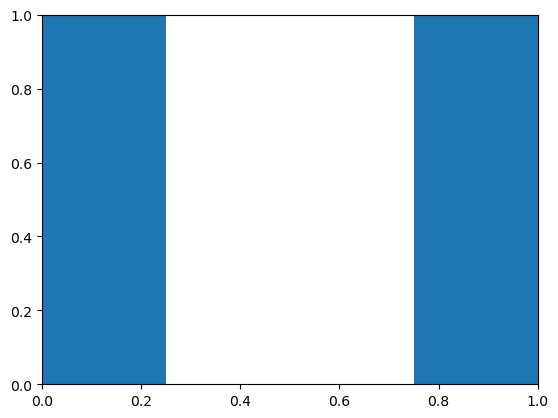

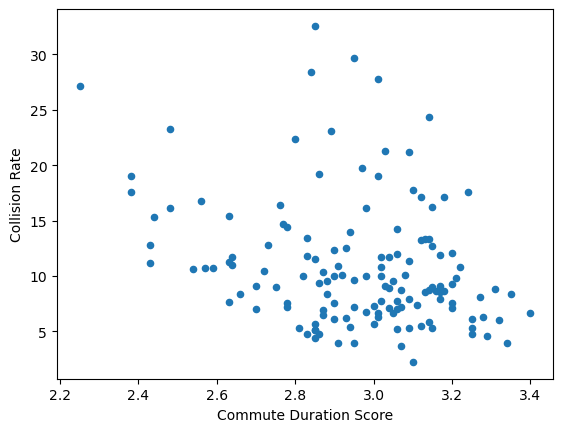

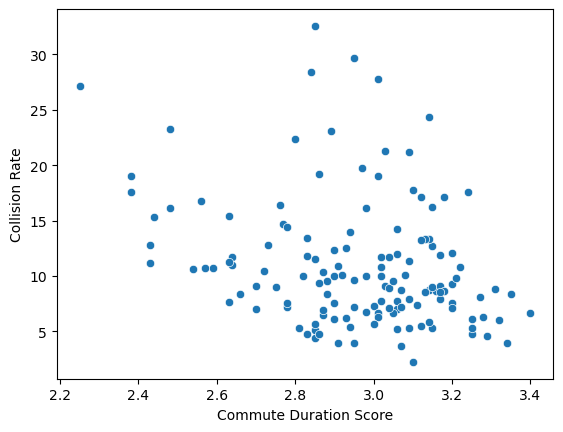

In [19]:
sns.scatterplot(data=neighbourhoods, x='Commute Duration Score', y='Collision Rate')
plt.show()

In [40]:
response = 'Collision Rate'
y = neighbourhoods[[response]]
y

,Collision Rate
0,9.126507
1,19.038599
2,7.010121
3,16.156719
4,22.365048
...,...
135,8.418705
136,16.425489
137,11.222861
138,24.397492


In [41]:
predictors = 'Population density per square kilometre'
x_density = neighbourhoods[[predictors]]
x_density

,Population density per square kilometre
0,3929
1,3034
2,2435
3,10863
4,2775
...,...
135,8541
136,7162
137,10708
138,2086


In [42]:
model_density = LinearRegression().fit(x_density, y)

In [43]:
model_density.intercept_

array([12.23638414])

In [44]:
model_density.coef_

array([[-0.0002074]])

In [45]:
model_density.score(x_density, y)

0.030074153523906855

In [46]:
predictors = 'Commute Mode Score'
x_commute_mode = neighbourhoods[[predictors]]
x_commute_mode

,Commute Mode Score
0,1.68
1,1.71
2,1.59
3,3.12
4,1.75
...,...
135,2.59
136,2.50
137,2.53
138,2.06


In [47]:
model_commute_mode = LinearRegression().fit(x_commute_mode, y)

In [48]:
model_commute_mode.intercept_

array([7.74334174])

In [49]:
model_commute_mode.coef_

array([[1.49784968]])

In [50]:
model_commute_mode.score(x_commute_mode, y)

0.01650757053658014

In [51]:
predictors = 'Private Vehicle Mode Share'
x_commute_car = neighbourhoods[[predictors]]
x_commute_car

,Private Vehicle Mode Share
0,0.61
1,0.60
2,0.68
3,0.22
4,0.63
...,...
135,0.33
136,0.33
137,0.32
138,0.46


In [52]:
model_commute_car = LinearRegression().fit(x_commute_car, y)

In [53]:
model_commute_car.intercept_

array([12.0707087])

In [54]:
model_commute_car.coef_

array([[-2.41368769]])

In [55]:
model_commute_car.score(x_commute_car, y)

0.0032587514358993763

In [73]:
predictors = 'Public Transit Mode Share'
x_commute_transit = neighbourhoods[[predictors]]
x_commute_transit

,Public Transit Mode Share
0,0.28
1,0.29
2,0.21
3,0.42
4,0.26
...,...
135,0.46
136,0.49
137,0.50
138,0.42


In [74]:
model_commute_transit = LinearRegression().fit(x_commute_transit, y)

In [75]:
model_commute_transit.intercept_

array([15.75260447])

In [59]:
model_commute_transit.coef_

array([[-12.85409662]])

In [60]:
model_commute_transit.score(x_commute_transit, y)

0.03696489273418868

In [61]:
predictors = 'Commute Duration Score'
x_commute_duration = neighbourhoods[[predictors]]
x_commute_duration

,Commute Duration Score
0,3.03
1,3.01
2,2.70
3,2.48
4,2.80
...,...
135,2.88
136,2.76
137,2.63
138,3.14


In [62]:
model_commute_duration = LinearRegression().fit(x_commute_duration, y)

In [63]:
model_commute_duration.intercept_

array([33.10677216])

In [64]:
model_commute_duration.coef_

array([[-7.50145575]])

In [65]:
model_commute_duration.score(x_commute_duration, y)

0.08752466661315039

In [66]:
neighbourhoods[['Neighbourhood', 'Collision Rate']].sort_values(by = ['Collision Rate'], ascending = False)

,Neighbourhood,Collision Rate
139,Yorkdale-Glen Park,32.579033
54,Humber Summit,29.647229
93,Old East York,28.452291
128,Wexford/Maryvale,27.750116
6,Bay Street Corridor,27.196961
...,...,...
115,Taylor-Massey,3.985207
56,Humewood-Cedarvale,3.967978
36,Edenbridge-Humber Valley,3.926617
134,Woodbine-Lumsden,3.699936


In [67]:
neighbourhoods[['Neighbourhood', 'PD_Collisions']].sort_values(by = ['PD_Collisions'], ascending = False)

,Neighbourhood,PD_Collisions
82,Mount Pleasant East,77.145181
111,St.Andrew-Windfields,76.21416
43,Forest Hill North,76.179383
93,Old East York,75.599543
4,Banbury-Don Mills,75.379399
...,...,...
94,Palmerston-Little Italy,60.677083
14,Blake-Jones,60.526316
80,Mount Dennis,60.286029
81,Mount Olive-Silverstone-Jamestown,59.212313


In [68]:
response = 'PD_Collisions'
y_pd = neighbourhoods[[response]]
y_pd

,PD_Collisions
0,69.025216
1,70.285209
2,68.52071
3,70.377129
4,75.379399
...,...
135,67.880795
136,71.458011
137,74.253201
138,69.073084


In [69]:
model_density_pd = LinearRegression().fit(x_density, y_pd)

In [70]:
model_density_pd.intercept_

array([68.11715319])

In [71]:
model_density_pd.coef_

array([[-4.54628493e-05]])

In [72]:
model_density_pd.score(x_density, y_pd)

0.003369493316282335